<a href="https://colab.research.google.com/github/LiliValGo/Cuentos_Con_Datos/blob/master/proyecto_minerales_col.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OBJETIVO:** 
## Analizar la producción de carbon y su generación de activos economicos al estado colombiano mediante regalias y compensaciones en los próximos años?

## Conectando Colab con nuestro drive 

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## Importando paquetes y librerias 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Importando y leyendo dataset de producción de Carbón 

In [3]:
df_produc_carbon = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/expo_minerales_col/produccion_carbon_col.csv')
df_produc_carbon

,Codigo DANE,Municipio Productor,Departamento,Recurso Natural,Nombre Del Proyecto,Año Produccion,Trimestre,Unidad Medida,Tipo Contraprestacion,Valor Contraprestacion,Cantidad Producción
0,5030,Amaga,Antioquia,CARBON,PRODUCTORES,2019,Trimestre 1,TONELADAS,REGALIA,29113583.0,4069
1,5030,Amaga,Antioquia,CARBON,PRODUCTORES,2012,Trimestre 1,TONELADAS,REGALIA,122838878.0,23309
2,5030,Amaga,Antioquia,CARBON,PRODUCTORES,2013,Trimestre 1,TONELADAS,REGALIA,119808689.0,28008
3,5030,Amaga,Antioquia,CARBON,PRODUCTORES,2014,Trimestre 1,TONELADAS,REGALIA,165165382.0,42968
4,5030,Amaga,Antioquia,CARBON,PRODUCTORES,2015,Trimestre 1,TONELADAS,REGALIA,73748476.0,17773
...,...,...,...,...,...,...,...,...,...,...,...
4580,85279,Recetor,Casanare,CARBON,PRODUCTORES,2014,Trimestre 4,TONELADAS,REGALIA,13576690.0,3152
4581,85279,Recetor,Casanare,CARBON,PRODUCTORES,2015,Trimestre 4,TONELADAS,REGALIA,10570854.0,2444
4582,85279,Recetor,Casanare,CARBON,PRODUCTORES,2016,Trimestre 4,TONELADAS,REGALIA,3095489.0,620
4583,85279,Recetor,Casanare,CARBON,PRODUCTORES,2017,Trimestre 4,TONELADAS,REGALIA,280547.0,26


# Exploración del DataFrame 

In [4]:
df_produc_carbon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4585 entries, 0 to 4584
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Codigo DANE              4585 non-null   int64  
 1   Municipio Productor      4585 non-null   object 
 2   Departamento             4585 non-null   object 
 3   Recurso Natural          4585 non-null   object 
 4   Nombre Del Proyecto      4585 non-null   object 
 5   Año Produccion           4585 non-null   int64  
 6   Trimestre                4585 non-null   object 
 7   Unidad Medida            4585 non-null   object 
 8   Tipo Contraprestacion    4585 non-null   object 
 9   Valor Contraprestacion   4585 non-null   float64
 10  Cantidad Producción      4585 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 394.1+ KB


# Editando estructura del DataFrame 

### Editando nombre de las columnas

In [5]:
df_produc_carbon.columns = ['Id_DANE', 'Municipio', 'Departamento', 'Mineral', 'Nombre_Proyecto', 'Año_Produccion', 'Trimestre', 'Unid_Medida', 'Tipo_Contraprestacion', 'Valor_Regalias', 'Cantidad_Produccion']
print(df_produc_carbon.head())

   Id_DANE Municipio  ... Valor_Regalias Cantidad_Produccion
0     5030     Amaga  ...     29113583.0                4069
1     5030     Amaga  ...    122838878.0               23309
2     5030     Amaga  ...    119808689.0               28008
3     5030     Amaga  ...    165165382.0               42968
4     5030     Amaga  ...     73748476.0               17773

[5 rows x 11 columns]


### Editando valores de la columna: 'Municipio'

Nuestro Dataset del Mineral Carbon presenta en la columna de 'Municipio' una **NO homogeneidad** en la descripción de los datos. Algunos Municipios venian acompañados por el departamento al que pertenecian aunque existe una columna especifica para el 'Departamento'. 

El primer paso fue: 

1. Identificar los municipios a actualizar.
2. Reemplazar los valores con el método **.replace()**

In [6]:
munucipios_actualizados_carbon = df_produc_carbon['Municipio'].replace({'Toledo - Antioquia': 'Toledo', 'Venecia - Antioquia': 'Venecia','Boyaca - Boyaca': 'Boyaca', 'Briceño - Boyaca': 'Briceño',
                  'Jerico - Boyaca': 'Jerico', 'El Tambo - Cauca': 'El Tambo', 'Morales - Cauca': 'Morales', 'Santa Maria - Boyaca': 'Santa Maria', 
                  'Suarez - Cauca': 'Suarez', 'San Cayetano - Cundinamarca': 'San Cayetano', 'Albania - La Guajira': 'Albania', 'Arboledas - Norte de Santander':'Arboledas', 
                  'San Cayetano - Norte de Santander': 'San Cayetano', 'Santiago - Norte de Santander': 'Santiago', 'Toledo - Norte de Santander': 'Toledo', 'Albania - Santander': 'Albania',
                  'San Miguel - Santander': 'San Miguel'})

3. Asignar los nuevos datos a la columna 'Municipio' del Dataframe: 'df_produc_carbon'

In [7]:
df_produc_carbon['Municipio'] = munucipios_actualizados_carbon

4. Verificar que la actualización se llevará a cabo 

In [8]:
df_produc_carbon['Municipio'].unique()

array(['Amaga', 'Angelopolis', 'Fredonia', 'Sopetran', 'Titiribi',
       'Toledo', 'Venecia', 'Tunja', 'Aquitania', 'Beteitiva', 'Boavita',
       'Boyaca', 'Briceño', 'Chiquinquira', 'Chiscas', 'Chita', 'Chivata',
       'Combita', 'Corrales', 'Cucaita', 'Duitama', 'El Espino',
       'Floresta', 'Gameza', 'Guacamayas', 'Iza', 'Jerico', 'La Uvita',
       'Mongua', 'Mongui', 'Motavita', 'Nobsa', 'Nuevo Colon', 'Paipa',
       'Paz de Rio', 'Pesca', 'Raquira', 'Saboya', 'Samaca', 'San Mateo',
       'Santa Maria', 'Sativanorte', 'Sativasur', 'Socota', 'Socha',
       'Sogamoso', 'Sotaquira', 'Susacon', 'Tasco', 'Tibana', 'Topaga',
       'Turmeque', 'Tuta', 'Umbita', 'Ventaquemada', 'Buenos Aires',
       'Cajibio', 'El Tambo', 'Morales', 'Patia', 'Suarez',
       'Agustin Codazzi', 'Becerril', 'Chiriguana', 'El Paso',
       'La Jagua de Ibirico', 'Puerto Libertador', 'Caparrapi', 'Cogua',
       'Cota', 'Cucunuba', 'Guacheta', 'Guatavita', 'Jerusalen',
       'Lenguazaque', 'Macheta

# **Exploración de Datos sobre la producción de Carbón**

## **Valores únicos de nuestras variables**

In [9]:
df_produc_carbon['Tipo_Contraprestacion'].unique()

array(['REGALIA', 'COMPENSACION'], dtype=object)

In [10]:
df_produc_carbon['Departamento'].unique()

array(['Antioquia', 'Boyaca', 'Cauca', 'Cesar', 'Cordoba', 'Cundinamarca',
       'La Guajira', 'Norte de Santander', 'Santander', 'Valle del Cauca',
       'Casanare'], dtype=object)

In [11]:
df_produc_carbon['Año_Produccion'].unique()

array([2019, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2020])

In [12]:
df_produc_carbon['Unid_Medida'].unique()

array(['TONELADAS'], dtype=object)

## **Alta y baja generación de regalias**

In [13]:
# Alta generación 

df_produc_carbon.nlargest(5,'Valor_Regalias')

,Id_DANE,Municipio,Departamento,Mineral,Nombre_Proyecto,Año_Produccion,Trimestre,Unid_Medida,Tipo_Contraprestacion,Valor_Regalias,Cantidad_Produccion
2325,20400,La Jagua de Ibirico,Cesar,CARBON,PRODECO - CALENTURITAS,2018,Trimestre 4,TONELADAS,REGALIA,1.554650e+11,528275
1951,20045,Becerril,Cesar,CARBON,PRODECO - CALENTURITAS,2013,Trimestre 4,TONELADAS,REGALIA,9.508367e+10,944065
2324,20400,La Jagua de Ibirico,Cesar,CARBON,PRODECO - CALENTURITAS,2017,Trimestre 4,TONELADAS,REGALIA,8.407413e+10,673647
2018,20045,Becerril,Cesar,CARBON,Drummond - El Descanso,2018,Trimestre 3,TONELADAS,REGALIA,7.609666e+10,4075752
1942,20045,Becerril,Cesar,CARBON,PRODECO - CALENTURITAS,2014,Trimestre 4,TONELADAS,REGALIA,7.453641e+10,477370


In [14]:
# Baja generación 

df_produc_carbon.nsmallest(5, 'Valor_Regalias')

,Id_DANE,Municipio,Departamento,Mineral,Nombre_Proyecto,Año_Produccion,Trimestre,Unid_Medida,Tipo_Contraprestacion,Valor_Regalias,Cantidad_Produccion
1849,20045,Becerril,Cesar,CARBON,PRODECO - CALENTURITAS,2018,Trimestre 1,TONELADAS,REGALIA,0.0,206907
2052,20178,Chiriguana,Cesar,CARBON,Drummond - La Loma,2014,Trimestre 1,TONELADAS,REGALIA,0.0,860789
2058,20178,Chiriguana,Cesar,CARBON,Drummond - La Loma,2014,Trimestre 1,TONELADAS,REGALIA,0.0,831477
2218,20400,La Jagua de Ibirico,Cesar,CARBON,PRODECO - CALENTURITAS,2018,Trimestre 1,TONELADAS,REGALIA,0.0,467110
2338,20400,La Jagua de Ibirico,Cesar,CARBON,Drummond - La Loma,2014,Trimestre 1,TONELADAS,REGALIA,0.0,866341


## **Alta y baja producción de Carbón**

In [15]:
# Alta producción 

df_produc_carbon.nlargest(5,'Cantidad_Produccion')

,Id_DANE,Municipio,Departamento,Mineral,Nombre_Proyecto,Año_Produccion,Trimestre,Unid_Medida,Tipo_Contraprestacion,Valor_Regalias,Cantidad_Produccion
3274,44035,Albania,La Guajira,CARBON,CERREJON CZN - CEMT,2014,Trimestre 2,TONELADAS,REGALIA,1.884709e+10,6703987
3257,44035,Albania,La Guajira,CARBON,CERREJON CZN - CEMT,2014,Trimestre 1,TONELADAS,REGALIA,2.056198e+10,6419249
3272,44035,Albania,La Guajira,CARBON,CERREJON CZN - CEMT,2013,Trimestre 2,TONELADAS,REGALIA,1.969657e+10,6373262
3276,44035,Albania,La Guajira,CARBON,CERREJON CZN - CEMT,2015,Trimestre 2,TONELADAS,REGALIA,1.767290e+10,6346723
3307,44035,Albania,La Guajira,CARBON,CERREJON CZN - CEMT,2013,Trimestre 4,TONELADAS,REGALIA,1.990822e+10,6203107


In [16]:
# Baja producción 

df_produc_carbon.nsmallest(5,'Cantidad_Produccion')

,Id_DANE,Municipio,Departamento,Mineral,Nombre_Proyecto,Año_Produccion,Trimestre,Unid_Medida,Tipo_Contraprestacion,Valor_Regalias,Cantidad_Produccion
63,5282,Fredonia,Antioquia,CARBON,PRODUCTORES,2012,Trimestre 4,TONELADAS,REGALIA,287282581.0,0
115,5861,Venecia,Antioquia,CARBON,PRODUCTORES,2012,Trimestre 4,TONELADAS,REGALIA,127171483.0,0
251,15106,Briceño,Boyaca,CARBON,PRODUCTORES,2018,Trimestre 4,TONELADAS,REGALIA,50000.0,0
512,15368,Jerico,Boyaca,CARBON,MINAS PAZ DEL RIO S.A.,2013,Trimestre 1,TONELADAS,COMPENSACION,12919818.0,0
514,15368,Jerico,Boyaca,CARBON,MINAS PAZ DEL RIO S.A.,2020,Trimestre 1,TONELADAS,COMPENSACION,7362330.0,0


## **NOTA:**
## ***Al analizar las variables 'Valor_Regalias',  'Cantidad_Produccion' se observo que existen datos faltantes. Vamos a visualizar los datos faltantes***
---



## **Datos Faltantes**

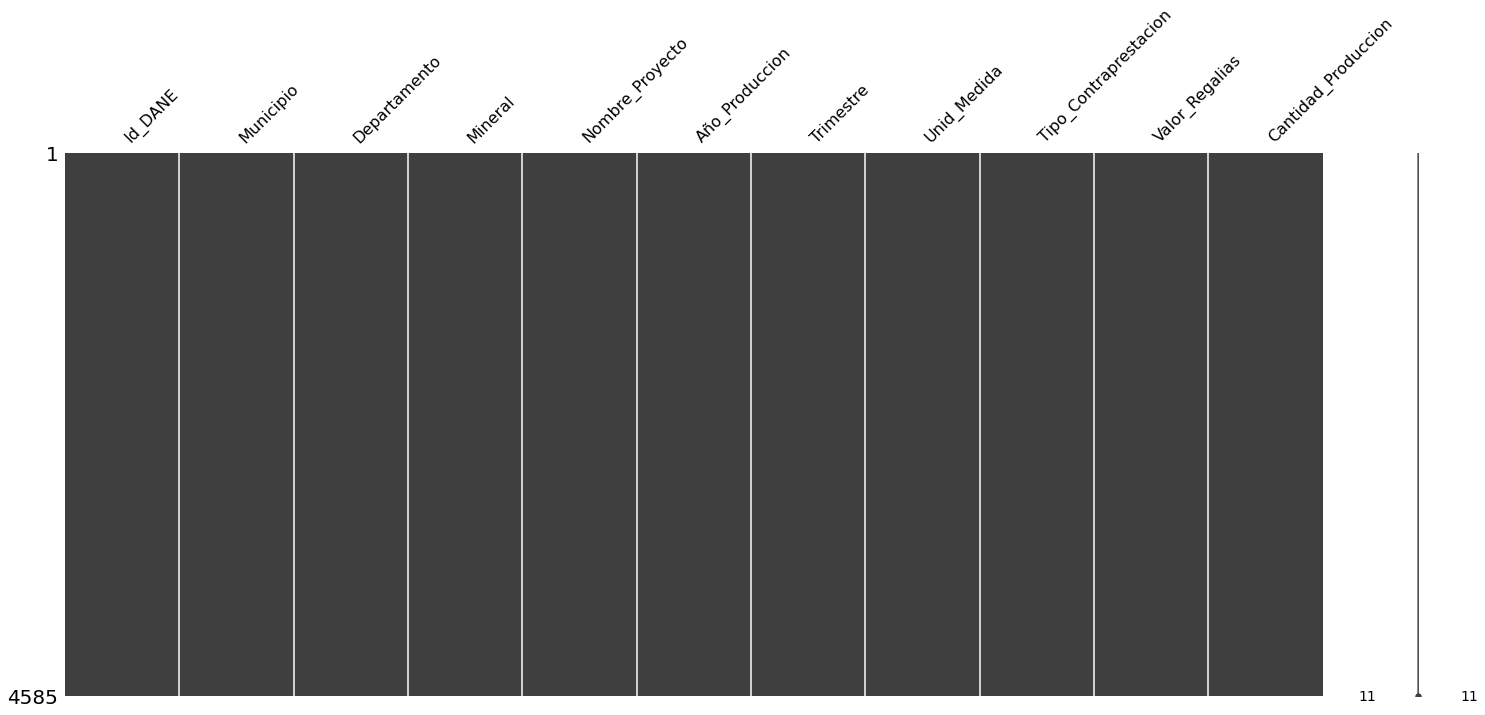

In [17]:
import missingno as msno
import matplotlib.pyplot as plt


msno.matrix(df_produc_carbon)

### **Usando métodos: isna(), isnull()**

In [18]:
df_produc_carbon.isna().sum()

Id_DANE                  0
Municipio                0
Departamento             0
Mineral                  0
Nombre_Proyecto          0
Año_Produccion           0
Trimestre                0
Unid_Medida              0
Tipo_Contraprestacion    0
Valor_Regalias           0
Cantidad_Produccion      0
dtype: int64

In [19]:
df_produc_carbon.isnull().sum()

Id_DANE                  0
Municipio                0
Departamento             0
Mineral                  0
Nombre_Proyecto          0
Año_Produccion           0
Trimestre                0
Unid_Medida              0
Tipo_Contraprestacion    0
Valor_Regalias           0
Cantidad_Produccion      0
dtype: int64

### **Usando método query()**

In [20]:
df_produc_carbon.query('Valor_Regalias == 0.0').value_counts()

Id_DANE  Municipio            Departamento  Mineral  Nombre_Proyecto                        Año_Produccion  Trimestre    Unid_Medida  Tipo_Contraprestacion  Valor_Regalias  Cantidad_Produccion
44378    Hatonuevo            La Guajira    CARBON   CERREJON - PATILLA                     2018            Trimestre 1  TONELADAS    REGALIA                0.0             797163                 1
44078    Barrancas            La Guajira    CARBON   CARBONES DEL CERREJON COMUNIDAD - RPP  2017            Trimestre 2  TONELADAS    REGALIA                0.0             51050                  1
                                                                                                            Trimestre 1  TONELADAS    REGALIA                0.0             71308                  1
20400    La Jagua de Ibirico  Cesar         CARBON   PRODECO - CALENTURITAS                 2018            Trimestre 1  TONELADAS    REGALIA                0.0             467110                 1
               

### **NOTA:  9 Datos faltantes**

---



In [21]:
df_produc_carbon.query('Cantidad_Produccion == 0.0').value_counts()

Id_DANE  Municipio  Departamento  Mineral  Nombre_Proyecto                  Año_Produccion  Trimestre    Unid_Medida  Tipo_Contraprestacion  Valor_Regalias  Cantidad_Produccion
85279    Recetor    Casanare      CARBON   PRODUCTORES                      2017            Trimestre 2  TONELADAS    REGALIA                3.727300e+05    0                      1
20045    Becerril   Cesar         CARBON   Drummond - El Descanso           2016            Trimestre 3  TONELADAS    COMPENSACION           1.008003e+10    0                      1
                                                                            2018            Trimestre 1  TONELADAS    COMPENSACION           5.650217e+10    0                      1
                                                                            2017            Trimestre 4  TONELADAS    COMPENSACION           3.063437e+10    0                      1
                                                                                            Tri

### **NOTA: 557 Datos Faltantes**

---



In [22]:
df_produc_carbon.query('Tipo_Contraprestacion == "COMPENSACION" and Cantidad_Produccion == 0.0')

,Id_DANE,Municipio,Departamento,Mineral,Nombre_Proyecto,Año_Produccion,Trimestre,Unid_Medida,Tipo_Contraprestacion,Valor_Regalias,Cantidad_Produccion
512,15368,Jerico,Boyaca,CARBON,MINAS PAZ DEL RIO S.A.,2013,Trimestre 1,TONELADAS,COMPENSACION,12919818.0,0
514,15368,Jerico,Boyaca,CARBON,MINAS PAZ DEL RIO S.A.,2020,Trimestre 1,TONELADAS,COMPENSACION,7362330.0,0
516,15368,Jerico,Boyaca,CARBON,MINAS PAZ DEL RIO S.A.,2012,Trimestre 2,TONELADAS,COMPENSACION,1090225.0,0
518,15368,Jerico,Boyaca,CARBON,MINAS PAZ DEL RIO S.A.,2013,Trimestre 2,TONELADAS,COMPENSACION,8992154.0,0
520,15368,Jerico,Boyaca,CARBON,MINAS PAZ DEL RIO S.A.,2019,Trimestre 2,TONELADAS,COMPENSACION,10540962.0,0
...,...,...,...,...,...,...,...,...,...,...,...
3706,54001,Cucuta,Norte de Santander,CARBON,PRODUCTORES,2012,Trimestre 4,TONELADAS,COMPENSACION,26034754.0,0
3708,54001,Cucuta,Norte de Santander,CARBON,PRODUCTORES,2013,Trimestre 4,TONELADAS,COMPENSACION,45717175.0,0
3710,54001,Cucuta,Norte de Santander,CARBON,PRODUCTORES,2014,Trimestre 4,TONELADAS,COMPENSACION,12523443.0,0
3712,54001,Cucuta,Norte de Santander,CARBON,PRODUCTORES,2015,Trimestre 4,TONELADAS,COMPENSACION,9996256.0,0


### **NOTA:** Tenemos 391 observaciones con cantidad de produccion = 0 en el tipo de contraprestación = 'COMPENSACION'

---



# **Exploración gráfica de los datos**

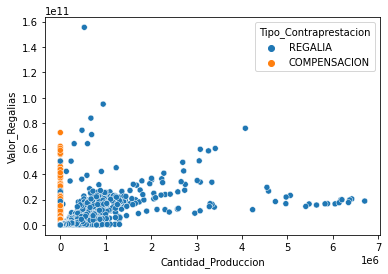

In [34]:
sns.scatterplot(x=df_produc_carbon['Cantidad_Produccion'], y=df_produc_carbon['Valor_Regalias'], hue=df_produc_carbon['Tipo_Contraprestacion'])

No existe una alta relación entre la produccion y la generación de activos económicos al estado. Mas adelante calcularemos en coeficiente de correlación entre ellas 

In [ ]:
sns.lineplot(x=df_produc_carbon['Año_Produccion'], y=df_produc_carbon['Valor_Regalias'], hue=df_produc_carbon['Tipo_Contraprestacion'])

# **Generación de regalias por Dpto**

In [ ]:
sns.barplot(x=df_produc_carbon['Valor_Regalias'], y=df_produc_carbon['Departamento'])


### **NOTA:** Se observa que el Dpto del Cesar es quien genera mayor regalias. La pregunta es, **¿Cuál es el tipo de contraprestación que predomina en el Dpto del Cesar?**
---



# **Producción de carbon por Dpto**

In [ ]:
sns.barplot(x=df_produc_carbon['Cantidad_Produccion'], y=df_produc_carbon['Departamento'])

### **NOTA:** Se observa que el Dpto de la Guajira es quien domina la producción de Carbón. Seguido por el  Dpto de Cesar.

---



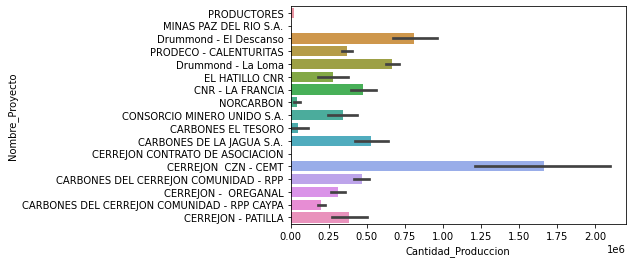

In [25]:
sns.barplot(x=df_produc_carbon['Cantidad_Produccion'], y=df_produc_carbon['Nombre_Proyecto'])

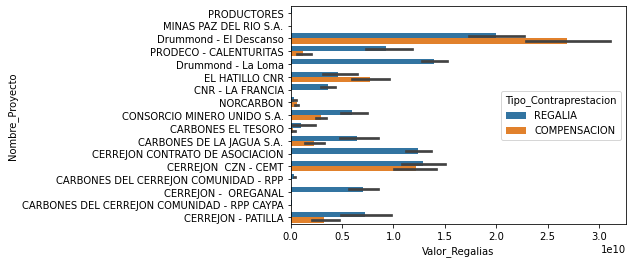

In [26]:
sns.barplot(x=df_produc_carbon['Valor_Regalias'], y=df_produc_carbon['Nombre_Proyecto'], hue=df_produc_carbon['Tipo_Contraprestacion'])

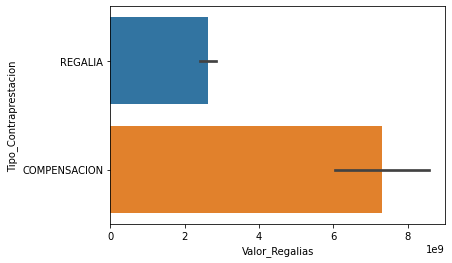

In [27]:
sns.barplot(x=df_produc_carbon['Valor_Regalias'], y=df_produc_carbon['Tipo_Contraprestacion'])

# **Producción filtrada por año 2012**

In [29]:
produccion_2012 = df_produc_carbon.query('Año_Produccion == 2012')
df_produccion_2012 = pd.DataFrame(produccion_2012)

df_produccion_2012

,Id_DANE,Municipio,Departamento,Mineral,Nombre_Proyecto,Año_Produccion,Trimestre,Unid_Medida,Tipo_Contraprestacion,Valor_Regalias,Cantidad_Produccion
1,5030,Amaga,Antioquia,CARBON,PRODUCTORES,2012,Trimestre 1,TONELADAS,REGALIA,122838878.0,23309
12,5030,Amaga,Antioquia,CARBON,PRODUCTORES,2012,Trimestre 2,TONELADAS,REGALIA,92134610.0,17071
21,5030,Amaga,Antioquia,CARBON,PRODUCTORES,2012,Trimestre 3,TONELADAS,REGALIA,134329659.0,176936
32,5030,Amaga,Antioquia,CARBON,PRODUCTORES,2012,Trimestre 4,TONELADAS,REGALIA,702435755.0,20606
41,5036,Angelopolis,Antioquia,CARBON,PRODUCTORES,2012,Trimestre 1,TONELADAS,REGALIA,5623564.0,1067
...,...,...,...,...,...,...,...,...,...,...,...
4557,76892,Yumbo,Valle del Cauca,CARBON,PRODUCTORES,2012,Trimestre 2,TONELADAS,REGALIA,6276562.0,1163
4559,76892,Yumbo,Valle del Cauca,CARBON,PRODUCTORES,2012,Trimestre 4,TONELADAS,REGALIA,6261248.0,1574
4562,85279,Recetor,Casanare,CARBON,PRODUCTORES,2012,Trimestre 1,TONELADAS,REGALIA,790500.0,150
4574,85279,Recetor,Casanare,CARBON,PRODUCTORES,2012,Trimestre 3,TONELADAS,REGALIA,199300.0,50


## Valores altos y bajos de las variables:


*   Cantidad_Produccion
*   Valor_Regalias



In [30]:
df_produccion_2012.nsmallest(5, 'Cantidad_Produccion')

,Id_DANE,Municipio,Departamento,Mineral,Nombre_Proyecto,Año_Produccion,Trimestre,Unid_Medida,Tipo_Contraprestacion,Valor_Regalias,Cantidad_Produccion
63,5282,Fredonia,Antioquia,CARBON,PRODUCTORES,2012,Trimestre 4,TONELADAS,REGALIA,287282581.0,0
115,5861,Venecia,Antioquia,CARBON,PRODUCTORES,2012,Trimestre 4,TONELADAS,REGALIA,127171483.0,0
516,15368,Jerico,Boyaca,CARBON,MINAS PAZ DEL RIO S.A.,2012,Trimestre 2,TONELADAS,COMPENSACION,1090225.0,0
524,15368,Jerico,Boyaca,CARBON,MINAS PAZ DEL RIO S.A.,2012,Trimestre 3,TONELADAS,COMPENSACION,2323284.0,0
530,15368,Jerico,Boyaca,CARBON,MINAS PAZ DEL RIO S.A.,2012,Trimestre 4,TONELADAS,COMPENSACION,1492720.0,0


In [31]:
df_produccion_2012.nsmallest(5, 'Valor_Regalias')

,Id_DANE,Municipio,Departamento,Mineral,Nombre_Proyecto,Año_Produccion,Trimestre,Unid_Medida,Tipo_Contraprestacion,Valor_Regalias,Cantidad_Produccion
4408,68266,Enciso,Santander,CARBON,PRODUCTORES,2012,Trimestre 2,TONELADAS,REGALIA,750.0,192
749,15491,Nobsa,Boyaca,CARBON,PRODUCTORES,2012,Trimestre 2,TONELADAS,REGALIA,1790.0,459
4476,68684,San Jose de Miranda,Santander,CARBON,PRODUCTORES,2012,Trimestre 2,TONELADAS,REGALIA,2531.0,96
1495,15804,Tibana,Boyaca,CARBON,PRODUCTORES,2012,Trimestre 4,TONELADAS,REGALIA,43670.0,11
3115,25885,Yacopi,Cundinamarca,CARBON,PRODUCTORES,2012,Trimestre 1,TONELADAS,REGALIA,104802.0,10


In [32]:
df_produccion_2012.nlargest(5, 'Cantidad_Produccion')

,Id_DANE,Municipio,Departamento,Mineral,Nombre_Proyecto,Año_Produccion,Trimestre,Unid_Medida,Tipo_Contraprestacion,Valor_Regalias,Cantidad_Produccion
3253,44035,Albania,La Guajira,CARBON,CERREJON CZN - CEMT,2012,Trimestre 1,TONELADAS,REGALIA,2.329091e+10,5066242
3270,44035,Albania,La Guajira,CARBON,CERREJON CZN - CEMT,2012,Trimestre 2,TONELADAS,REGALIA,2.199837e+10,4973377
3305,44035,Albania,La Guajira,CARBON,CERREJON CZN - CEMT,2012,Trimestre 4,TONELADAS,REGALIA,1.680442e+10,4967705
3287,44035,Albania,La Guajira,CARBON,CERREJON CZN - CEMT,2012,Trimestre 3,TONELADAS,REGALIA,1.846230e+10,4737051
1826,20013,Agustin Codazzi,Cesar,CARBON,Drummond - El Descanso,2012,Trimestre 4,TONELADAS,REGALIA,3.406417e+10,2661367


### **NOTA:** Tenemos como gran productor CERREJON CZN - CEMT pero como mayor generador de regalias a Drummond - El Descanso

---



In [33]:
df_produccion_2012.nlargest(5, 'Valor_Regalias')

,Id_DANE,Municipio,Departamento,Mineral,Nombre_Proyecto,Año_Produccion,Trimestre,Unid_Medida,Tipo_Contraprestacion,Valor_Regalias,Cantidad_Produccion
1827,20013,Agustin Codazzi,Cesar,CARBON,Drummond - El Descanso,2012,Trimestre 4,TONELADAS,COMPENSACION,5.032030e+10,0
1783,20013,Agustin Codazzi,Cesar,CARBON,Drummond - El Descanso,2012,Trimestre 2,TONELADAS,COMPENSACION,3.877866e+10,0
1805,20013,Agustin Codazzi,Cesar,CARBON,Drummond - El Descanso,2012,Trimestre 3,TONELADAS,COMPENSACION,3.717180e+10,0
1782,20013,Agustin Codazzi,Cesar,CARBON,Drummond - El Descanso,2012,Trimestre 2,TONELADAS,REGALIA,3.635367e+10,2234124
1826,20013,Agustin Codazzi,Cesar,CARBON,Drummond - El Descanso,2012,Trimestre 4,TONELADAS,REGALIA,3.406417e+10,2661367
